# Data exploration

We explore the KLIFS dataset used to generate `kissim` fingerprints.

- Load filtered structures from `prepare_dataset.ipynb` by structure KLIFS IDs.
- Explore kinases in dataset
- Explore structures in dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from opencadd.databases.klifs import setup_remote
from kissim.definitions import ANCHOR_RESIDUES

from src.data.structures import explorer

In [3]:
pd.set_option("display.max_columns", 50)

In [4]:
SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION_MAX = 4

HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../data/processed/"

## Load structures (metadata) from KLIFS structure IDs

In [5]:
remote = setup_remote()

In [6]:
structure_klifs_ids = pd.read_csv(
    DATA / "structure_klifs_ids.txt", squeeze=True, header=None
).to_list()
print(f"Number of structures: {len(structure_klifs_ids)}")

Number of structures: 5265


In [7]:
structures = remote.structures.by_structure_klifs_id(structure_klifs_ids)

## Explore kinases in dataset

In [8]:
n_structures = len(structures)
n_kinases = len(structures["kinase.klifs_id"].unique())
print(f"Number of structures in dataset: {n_structures}")
print(f"Number of kinases in dataset: {n_kinases}")

Number of structures in dataset: 5265
Number of kinases in dataset: 294


### Number structures per kinase

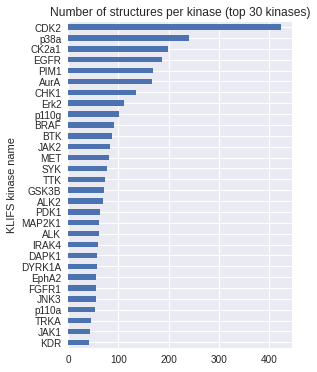

In [9]:
explorer.plot_number_of_structures_per_kinase(structures);

In [10]:
structures.groupby("kinase.klifs_name").size().sort_values(ascending=False).head()

kinase.klifs_name
CDK2     424
p38a     241
CK2a1    199
EGFR     187
PIM1     168
dtype: int64

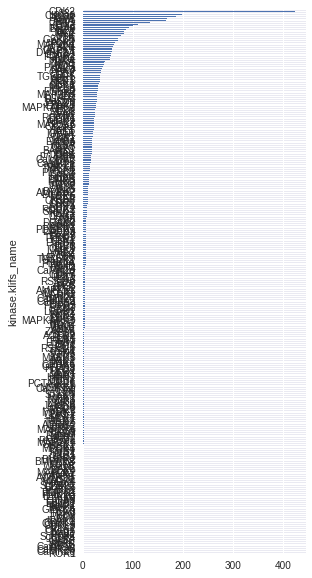

In [11]:
structures.groupby("kinase.klifs_name").size().sort_values().plot(kind="barh", figsize=(4, 10));

In [12]:
n_structures_per_kinase = structures.groupby("kinase.klifs_name").size()
for i in [1, 2, 3, 4, 5]:
    print(f"Number of kinase with {i} structure: {sum(n_structures_per_kinase == i)}")
for i in [5, 10]:
    print(f"Number of kinase with > {i} structures: {sum(n_structures_per_kinase > i)}")

Number of kinase with 1 structure: 59
Number of kinase with 2 structure: 40
Number of kinase with 3 structure: 23
Number of kinase with 4 structure: 20
Number of kinase with 5 structure: 14
Number of kinase with > 5 structures: 138
Number of kinase with > 10 structures: 99


### Number of kinases per kinase group

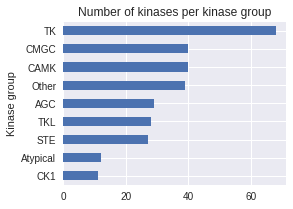

In [13]:
explorer.plot_number_of_kinases_per_kinase_group(structures, remote);

## Explore structures in dataset

### Species, DFG/aC-helix conformations, ligand

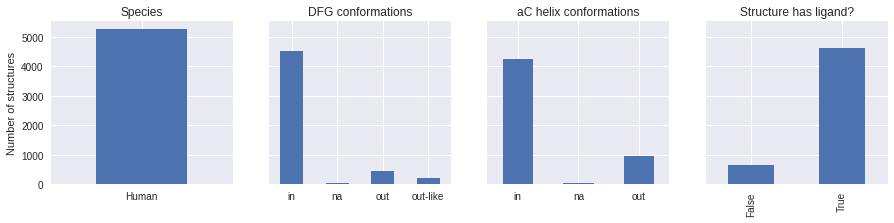

In [14]:
explorer.plot_important_categories(structures);

Number of structures per DFG/aC-helix conformation:

In [15]:
structures.groupby(["structure.dfg", "structure.ac_helix"]).size().unstack()

structure.ac_helix,in,na,out
structure.dfg,,,
in,3692,18,829
na,48,2,9
out,378,5,82
out-like,150,9,43


Percentage of structures per DFG/aC-helix conformation:

In [16]:
round(structures.groupby(["structure.dfg", "structure.ac_helix"]).size().unstack() / len(structures) * 100, 1)

structure.ac_helix,in,na,out
structure.dfg,,,
in,70.1,0.3,15.7
na,0.9,0.0,0.2
out,7.2,0.1,1.6
out-like,2.8,0.2,0.8


Percentage of ligand-bound structures:

In [17]:
round(len(structures[structures["ligand.expo_id"] != "-"]) / len(structures) * 100, 1)

87.6

### Resolution vs. quality score

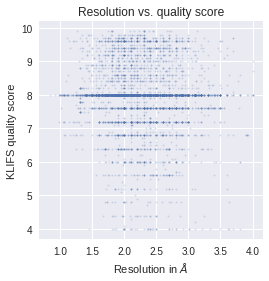

In [18]:
explorer.plot_resolution_vs_qualityscore(structures);

## Explore pockets in final dataset

### Missing residues in the kinase binding site

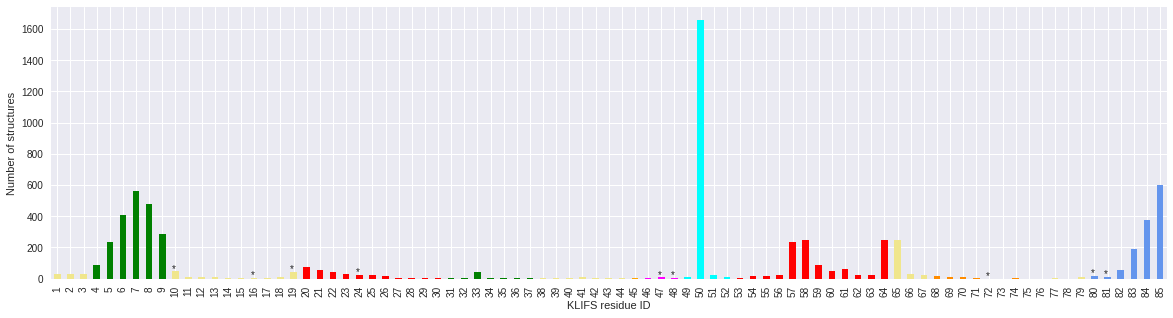

In [19]:
explorer.plot_missing_residues(structures, remote, ANCHOR_RESIDUES);

### Number of structures that will have no subpocket centers

... because the subpockets' anchor residues are missing (gaps in the structure).

Percentage of structures with missing subpocket:
dfg_region      1.46
front_pocket    0.95
hinge_region    0.51
dtype: float64


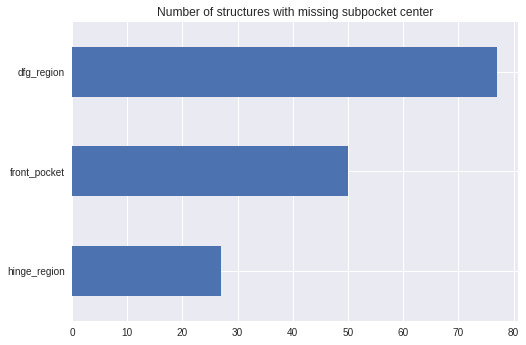

In [20]:
explorer.plot_missing_subpockets(structures, ANCHOR_RESIDUES);

### Modified residues

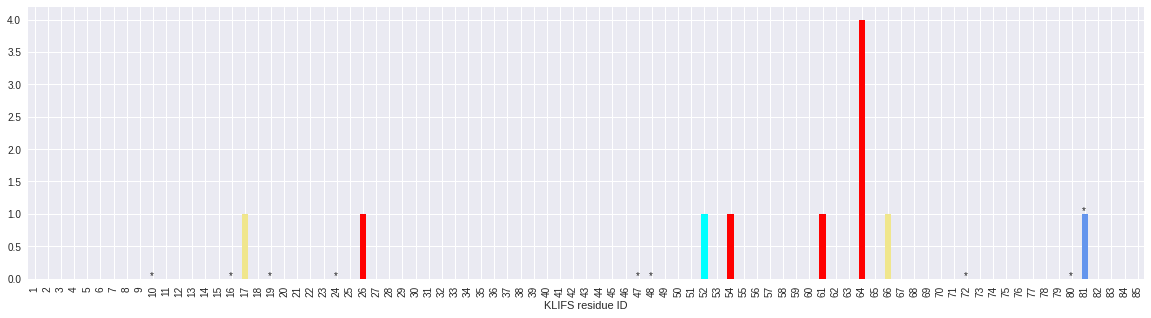

In [21]:
explorer.plot_modified_residues(structures, remote, ANCHOR_RESIDUES);

In [22]:
structures[structures["structure.pocket"].str.contains("X")]

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath
670,1649,2ydj,-,A,Human,121,CHK1,<NA>,<NA>,QTLGEGAYGEVQLVAVKIVNIKKEIXINKMLNENVVKFYGHYLFLE...,YDJ,-,<NA>,<NA>,in,in,1.85,9.7,0,3,0.776,2.099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.434200,57.410702,41.321999,<NA>
863,2020,4j8m,-,A,Human,259,AurA,<NA>,<NA>,RPLGKGKFGNVYLLALKVLQLRREVEIQSHLRPNILRLYGYYLILE...,CJ5,-,<NA>,<NA>,in,in,1.85,8.0,0,0,0.837,2.069,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.379200,67.263496,45.162201,<NA>
1083,2398,1yi3,-,A,Human,160,PIM1,<NA>,<NA>,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,LY2,-,<NA>,<NA>,in,in,2.50,8.0,0,0,0.802,2.134,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.555799,54.263100,41.433998,<NA>
1088,2403,1yi4,-,A,Human,160,PIM1,<NA>,<NA>,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,ADN,-,<NA>,<NA>,in,in,2.40,8.0,0,0,0.807,2.139,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.423599,53.612701,36.702400,<NA>
1103,2444,1yhs,-,A,Human,160,PIM1,<NA>,<NA>,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,STU,-,<NA>,<NA>,in,in,2.15,8.0,0,0,0.813,2.141,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.277300,53.184898,41.941200,<NA>
1595,3450,2r9s,-,A,Human,247,JNK3,<NA>,<NA>,KPIGSGAQGIVCAVAIKKLRAYRELVLMKCVNKNIISLLNVYLVME...,255,-,<NA>,<NA>,in,in,2.40,8.0,0,0,0.850,2.207,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.766800,49.098701,28.898001,<NA>
2063,4389,1oir,-,A,Human,198,CDK2,<NA>,<NA>,EKIGEGTYGVVYKVALXKITAIREISLLKELNPNIVKLLDVYLVFE...,HDY,-,<NA>,<NA>,in,out,1.91,9.0,0,10,0.834,2.186,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.140400,48.056801,68.246696,<NA>
2497,5334,3c7q,-,A,Human,485,KDR,<NA>,<NA>,KPLGRGAFGQVIEVAVKMLALMSELKILIHIGLNVVNLLGAMVIVE...,XIN,-,<NA>,<NA>,out,in,2.10,6.8,3,0,0.826,2.174,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,19.051701,64.387802,43.142502,<NA>
3196,7215,2j5e,-,A,Human,406,EGFR,<NA>,<NA>,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,-,-,<NA>,<NA>,in,in,3.10,8.0,0,0,0.777,2.109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.243601,58.909302,24.077101,<NA>
3582,8654,5o12,-,A,Human,160,PIM1,<NA>,<NA>,PLLGS____SVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,1RO,-,<NA>,<NA>,in,in,2.40,7.6,4,8,0.803,2.006,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>
